In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("C:\\2 ND YEAR\\PROJECTS\\AI FOR DS PROJECT NEW\\BITCOINPREDICTION\\BTC-USD.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2784,2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2785,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2786,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490
2787,2022-05-05,39695.746094,39789.281250,35856.515625,36575.140625,36575.140625,43106256317


In [4]:
projection =30
dataset['prediction']=dataset[['Close']].shift(-projection)
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,prediction
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,383.757996
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,391.441986
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,389.545990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,382.845001
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,386.475006
...,...,...,...,...,...,...,...,...
2784,2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426,NaN
2785,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244,NaN
2786,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490,NaN
2787,2022-05-05,39695.746094,39789.281250,35856.515625,36575.140625,36575.140625,43106256317,NaN


In [5]:
x=np.array(dataset[['Close']])
x=x[:-projection]
print(x)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [46622.675781]
 [45555.992188]
 [43206.738281]]


In [6]:
y=dataset['prediction'].values
y=y[:-projection]
print(y)

[  383.757996   391.441986   389.54599  ... 39698.371094 36575.140625
 36232.101563]


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= .15)

In [8]:
linReg=LinearRegression().fit(x_train,y_train)
linReg

LinearRegression()

In [9]:
linReg_confidence =linReg.score(x_test,y_test)
print(linReg_confidence)

0.9426669942889976


In [10]:
x_prediction=np.array(dataset[['Close']])[-projection:]
print(x_prediction)

[[43503.847656]
 [42287.664063]
 [42782.136719]
 [42207.671875]
 [39521.902344]
 [40127.183594]
 [41166.730469]
 [39935.515625]
 [40553.464844]
 [40424.484375]
 [39716.953125]
 [40826.214844]
 [41502.75    ]
 [41374.378906]
 [40527.363281]
 [39740.320313]
 [39486.730469]
 [39469.292969]
 [40458.308594]
 [38117.460938]
 [39241.121094]
 [39773.828125]
 [38609.824219]
 [37714.875   ]
 [38469.09375 ]
 [38529.328125]
 [37750.453125]
 [39698.371094]
 [36575.140625]
 [36232.101563]]


In [11]:
linReg_prediction=linReg.predict(x_prediction)
print(linReg_prediction)

[43007.60195876 41826.27452863 42306.57545963 41748.57493917
 39139.78031618 39727.7140358  40737.46720581 39541.53932455
 40141.77794562 40016.49409303 39329.2408871  40406.71085412
 41063.85632281 40939.16438037 40116.42446074 39351.93836493
 39105.61647698 39088.67874063 40049.34890043 37775.59059477
 38867.04633556 39384.48583364 38253.84260605 37384.54288266
 38117.14551176 38175.65355268 37419.10132862 39311.19142232
 36277.4736145  35944.26614823]


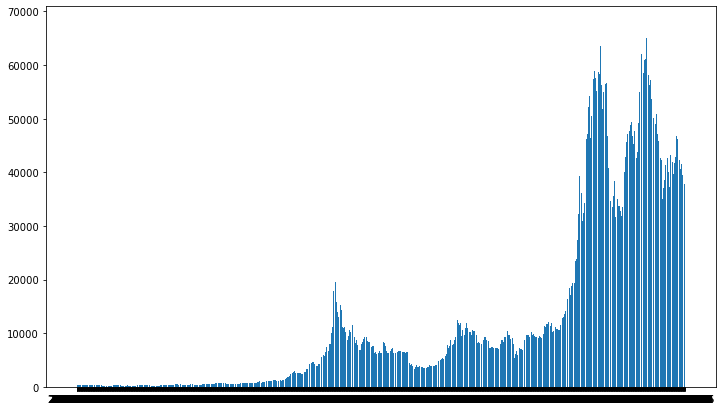

In [12]:
plt.figure(figsize=(12, 7))
bar=plt.bar(dataset.Date,height=dataset.Close)

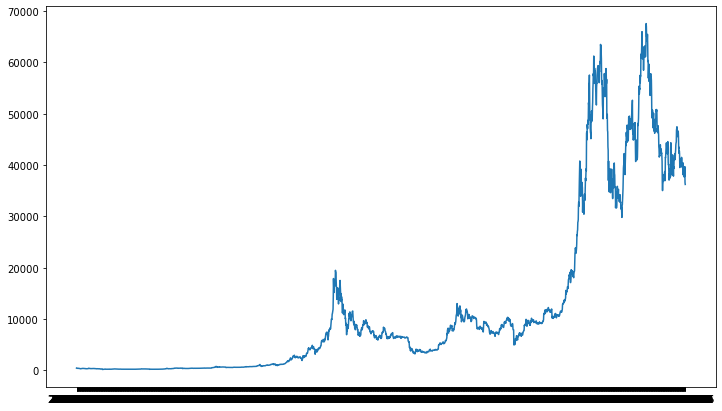

In [13]:
plt.figure(figsize=(12,7))
fig=plt.plot(dataset.Date,dataset.Close)

In [14]:
np.savetxt("C:\\2 ND YEAR\PROJECTS\\AI FOR DS PROJECT NEW\\BITCOINPREDICTION\\BTCPREDC.csv",linReg_prediction)
df=pd.read_csv("C:\\2 ND YEAR\PROJECTS\\AI FOR DS PROJECT NEW\\BITCOINPREDICTION\\BTCPREDC.csv")
df

,4.300760195875872159e+04
0,41826.274529
1,42306.575460
2,41748.574939
3,39139.780316
4,39727.714036
5,40737.467206
6,39541.539325
7,40141.777946
8,40016.494093
9,39329.240887
